In [3]:
import math
import pandas as pd

# Load Thrifted Jeans data
goober = pd.read_csv('/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data/Goober Eats_price_history.csv')
goober

,Day,Price
0,0,1.49
1,1,1.53
2,2,1.49
3,3,1.48
4,4,1.50
...,...,...
360,360,1.51
361,361,1.50
362,362,1.47
363,363,1.53


In [4]:
goober['EMA15'] = goober['Price'].ewm(span=15, adjust=False).mean()
goober['EMA5'] = goober['Price'].ewm(span=5, adjust=False).mean()
goober

,Day,Price,EMA15,EMA5
0,0,1.49,1.490000,1.490000
1,1,1.53,1.495000,1.503333
2,2,1.49,1.494375,1.498889
3,3,1.48,1.492578,1.492593
4,4,1.50,1.493506,1.495062
...,...,...,...,...
360,360,1.51,1.485998,1.490895
361,361,1.50,1.487748,1.493930
362,362,1.47,1.485530,1.485953
363,363,1.53,1.491088,1.500636


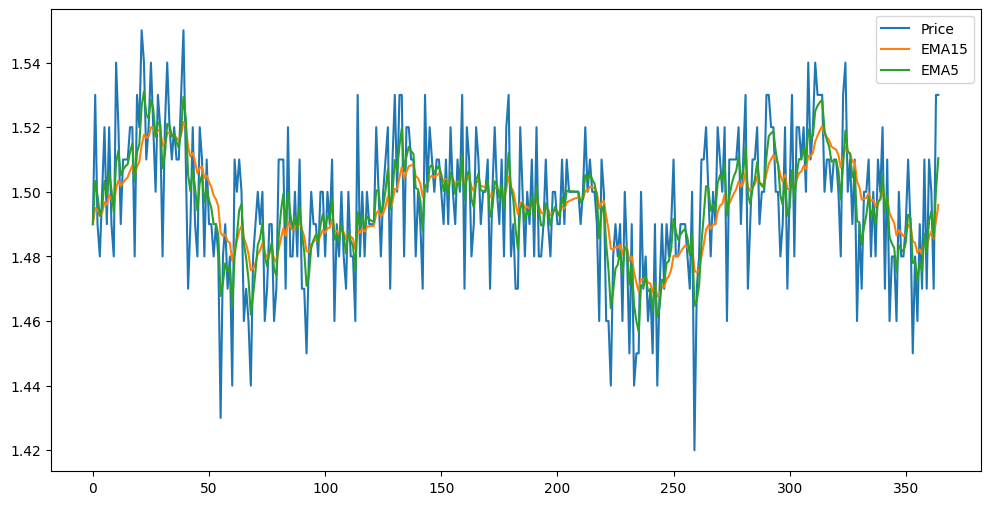

In [5]:
# plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(goober['Price'], label='Price')
plt.plot(goober['EMA15'], label='EMA15')
plt.plot(goober['EMA5'], label='EMA5')
plt.legend()
plt.show()


EWM size analysis 


span = 3, profit = 378k
span = 4, profit = 384k
span = 5, profit = 381k
span = 6, profit = 387k
span = 7, profit = 385.5k
span = 8, profit = 387k
span = 9, profit = 393k
span = 10, profit = 385.5k
span = 11, profit = 373.5k
span = 12, profit = 381k
span = 13, profit = 393k
span = 14, profit = 393k
span = 15, profit = 391.5k
span = 16, profit = 390k
span = 17, profit = 382.5k
span = 18, profit = 378k
span = 19, profit = 378k
span = 20, profit = 375k
span = 21, profit = 375k
span = 22, profit = 379.5k
span = 23, profit = 369k
span = 24, profit = 373.5k
span = 25, profit = 373.5k

Max is both 9 and 13.


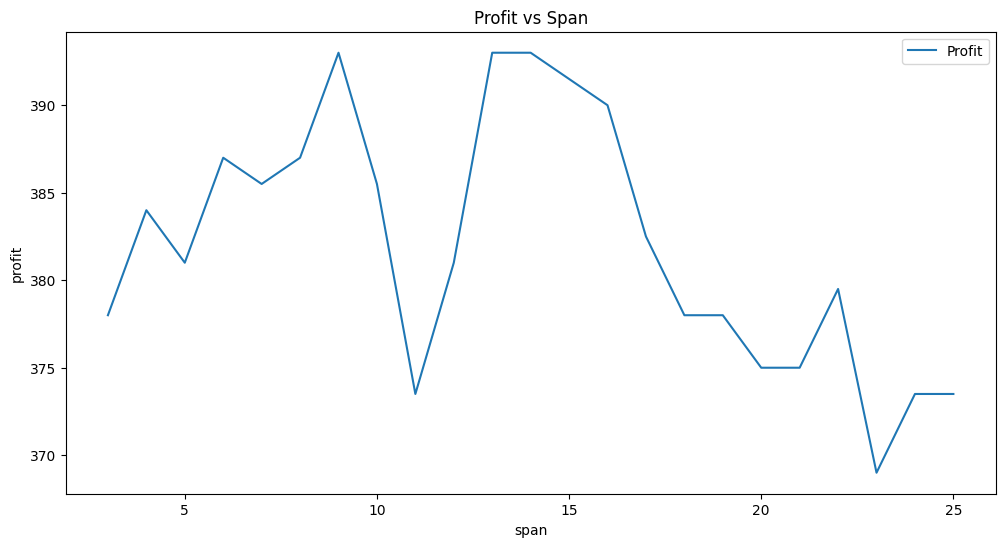

In [6]:
# take above and put in a list
'''span = 3, profit = 378k
span = 4, profit = 384k
span = 5, profit = 381k
span = 6, profit = 387k
span = 7, profit = 385.5k
span = 8, profit = 387k
span = 9, profit = 393k
span = 10, profit = 385.5k
span = 11, profit = 373.5k
span = 12, profit = 381k
span = 13, profit = 393k
span = 14, profit = 393k
span = 15, profit = 391.5k
span = 16, profit = 390k
span = 17, profit = 382.5k
span = 18, profit = 378k
span = 19, profit = 378k
span = 20, profit = 375k
span = 21, profit = 375k
span = 22, profit = 379.5k
span = 23, profit = 369k
span = 24, profit = 373.5k
span = 25, profit = 373.5k'''
# take above and put in 2 lists, one for span and one for profit
span = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
profit = [378,384,381,387,385.5,387,393,385.5,373.5,381,393,393,391.5,390,382.5,378,378,375,375,379.5,369,373.5,373.5]
# plot them
plt.figure(figsize=(12,6))
plt.plot(span, profit, label='Profit')
plt.legend()
plt.xlabel('span')
plt.ylabel('profit')
plt.title('Profit vs Span')
plt.show()


Wrote some stuff to do this automatically.
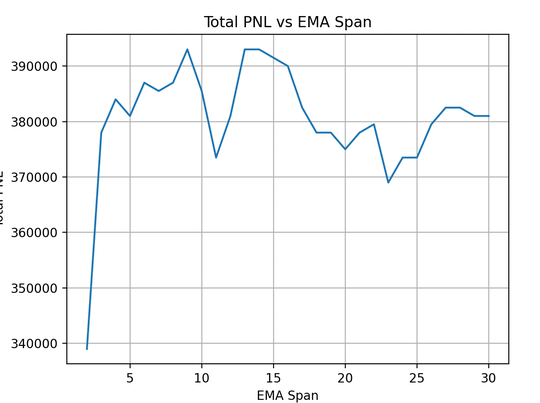

Now to compare to how this is for a rolling average
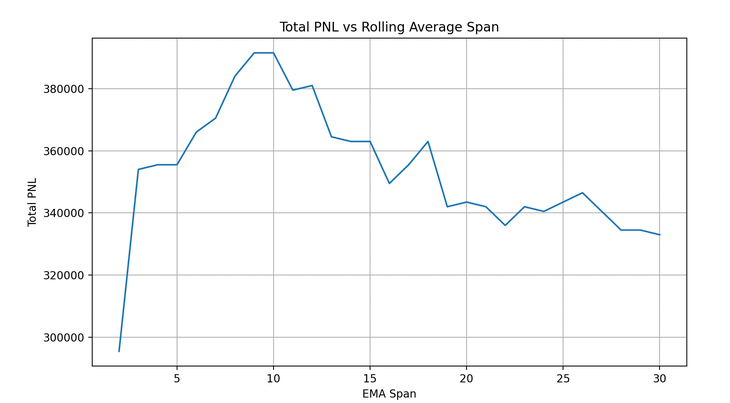

So EMA seems higher performing and maybe more robut at about a window of 13

Datasets loaded successfully.
Total PNL @ Day 0: 0
Total PNL @ Day 1: 3000.00
Total PNL @ Day 2: 6000.00
Total PNL @ Day 3: 5250.00
Total PNL @ Day 4: 6750.00
Total PNL @ Day 5: 5250.00
Total PNL @ Day 6: 7500.00
Total PNL @ Day 7: 9750.00
Total PNL @ Day 8: 12000.00
Total PNL @ Day 9: 11250.00
Total PNL @ Day 10: 15750.00
Total PNL @ Day 11: 17250.00
Total PNL @ Day 12: 19500.00
Total PNL @ Day 13: 21000.00
Total PNL @ Day 14: 21000.00
Total PNL @ Day 15: 21000.00
Total PNL @ Day 16: 20250.00
Total PNL @ Day 17: 20250.00
Total PNL @ Day 18: 23250.00
Total PNL @ Day 19: 27000.00
Total PNL @ Day 20: 27750.00
Total PNL @ Day 21: 25500.00
Total PNL @ Day 22: 26250.00
Total PNL @ Day 23: 28500.00
Total PNL @ Day 24: 29250.00
Total PNL @ Day 25: 27750.00
Total PNL @ Day 26: 29250.00
Total PNL @ Day 27: 27750.00
Total PNL @ Day 28: 30000.00
Total PNL @ Day 29: 30750.00
Total PNL @ Day 30: 33750.00
Total PNL @ Day 31: 36750.00
Total PNL @ Day 32: 35250.00
Total PNL @ Day 33: 36750.00
Total PN

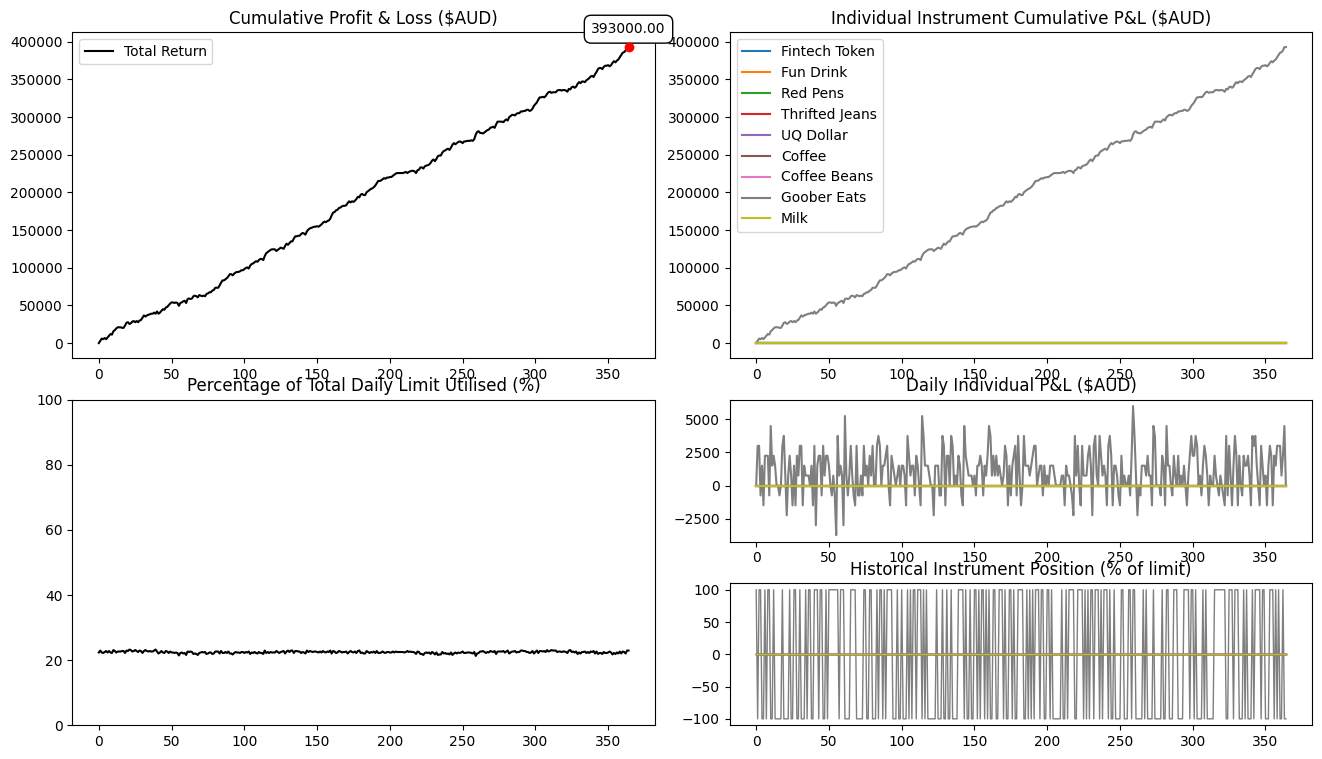

In [20]:
# import sys
# import os

# # Add the parent directory to sys.path
# parent_dir = '/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/'
# data_dir = '/Users/jameshurst/Library/CloudStorage/SynologyDrive-james/Dropbox/Quant/AlgoJam2024/data'
# sys.path.append(parent_dir)

# Now you can import the simulation module
from simulation import TradingEngine, Algorithm, positionLimits

engine = TradingEngine()
algorithmInstance = Algorithm(engine.positions)
engine.run_algorithms(algorithmInstance)
engine.plot_returns()



In [31]:
# read engine.positions into a df for Goober Eats
# goober_df = pd.DataFrame(engine.positions["Goober Eats"])
goober_df = pd.DataFrame(algorithmInstance.data["Goober Eats"])
# make the name of the first column price
goober_df.columns = ['Price']
pos_limit = positionLimits["Goober Eats"]

goober_df['Position'] = engine.pcPositionHistorys["Goober Eats"]
goober_df['Position'] = goober_df['Position']*pos_limit/100
goober_df



,Price,Position
0,1.49,75000.0
1,1.53,-75000.0
2,1.49,75000.0
3,1.48,75000.0
4,1.50,-75000.0
...,...,...
360,1.51,-75000.0
361,1.50,-75000.0
362,1.47,75000.0
363,1.53,-75000.0


In [32]:
goober_df['Transaction'] = goober_df['Position'].diff()
goober_df['Transaction'] = goober_df['Transaction'].fillna(0 + goober_df['Position'])

goober_df['CashFlow'] = -goober_df['Transaction'] * goober_df['Price']
goober_df['CashPos'] = goober_df['CashFlow'].cumsum()

goober_df['PnL'] = goober_df['Position'] * goober_df['Price'] + goober_df['CashPos']
goober_df

,Price,Position,Transaction,CashFlow,CashPos,PnL
0,1.49,75000.0,75000.0,-111750.0,-111750.0,0.0
1,1.53,-75000.0,-150000.0,229500.0,117750.0,3000.0
2,1.49,75000.0,150000.0,-223500.0,-105750.0,6000.0
3,1.48,75000.0,0.0,-0.0,-105750.0,5250.0
4,1.50,-75000.0,-150000.0,225000.0,119250.0,6750.0
...,...,...,...,...,...,...
360,1.51,-75000.0,-150000.0,226500.0,498750.0,385500.0
361,1.50,-75000.0,0.0,-0.0,498750.0,386250.0
362,1.47,75000.0,150000.0,-220500.0,278250.0,388500.0
363,1.53,-75000.0,-150000.0,229500.0,507750.0,393000.0


In [42]:
# add a column that is 1 if the transaction is positive, -1 if negative, 0 if 0
def traded_posneg(row):
    if row['Transaction'] > 0:
        row['Traded'] = 1
    elif row['Transaction'] < 0:
        row['Traded'] = -1
    else:
        row['Traded'] = 0
    return row

# apply the above function to the goober_df
goober_df = goober_df.apply(traded_posneg, axis=1)
# goober_df['Traded'] = goober_df.apply(traded_posneg)

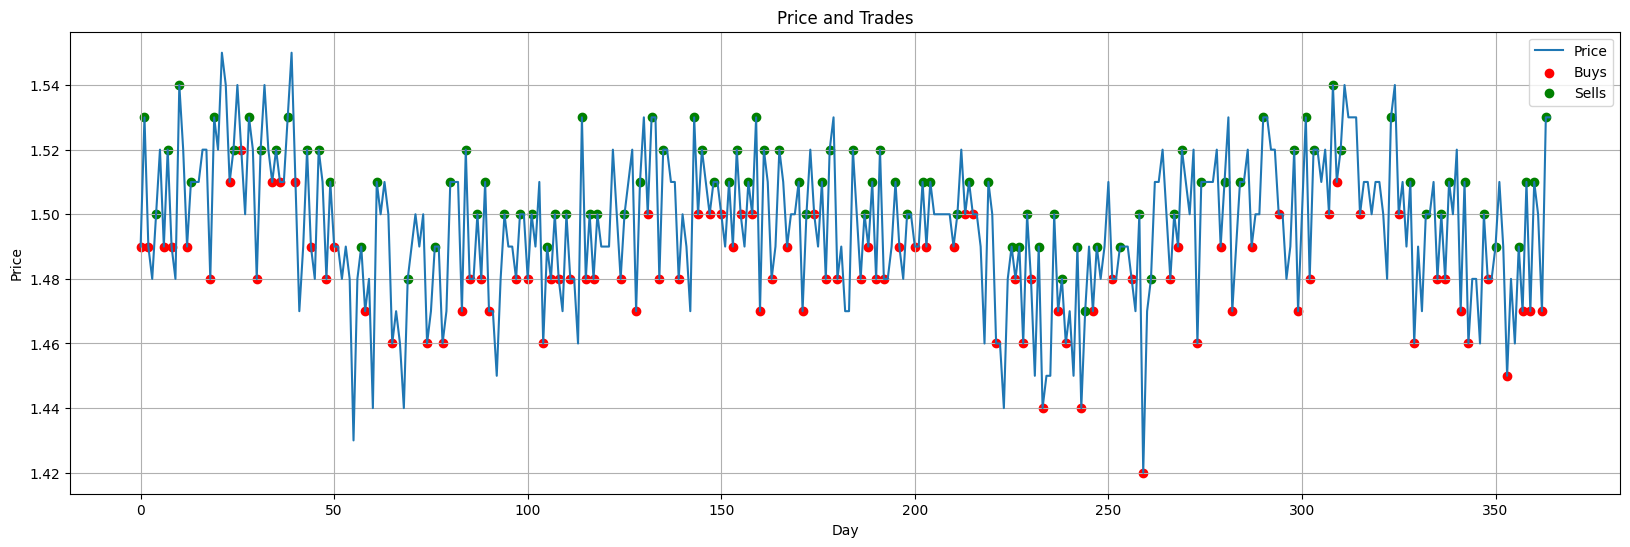

In [45]:

plt.figure(figsize=(20,6))
# create a list that is the index of the df where the trade was positive
buy_trade = goober_df.index[goober_df['Traded'] == 1].tolist()
# create a list that is the index of the df where the trade was negative
sell_trade = goober_df.index[goober_df['Traded'] == -1].tolist()

plt.plot(goober_df['Price'], label='Price')
plt.scatter(buy_trade, goober_df['Price'][goober_df['Traded'] == 1], color='red', label='Buys')
plt.scatter(sell_trade, goober_df['Price'][goober_df['Traded'] == -1], color='green', label='Sells')
plt.legend()
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price and Trades')
plt.show()

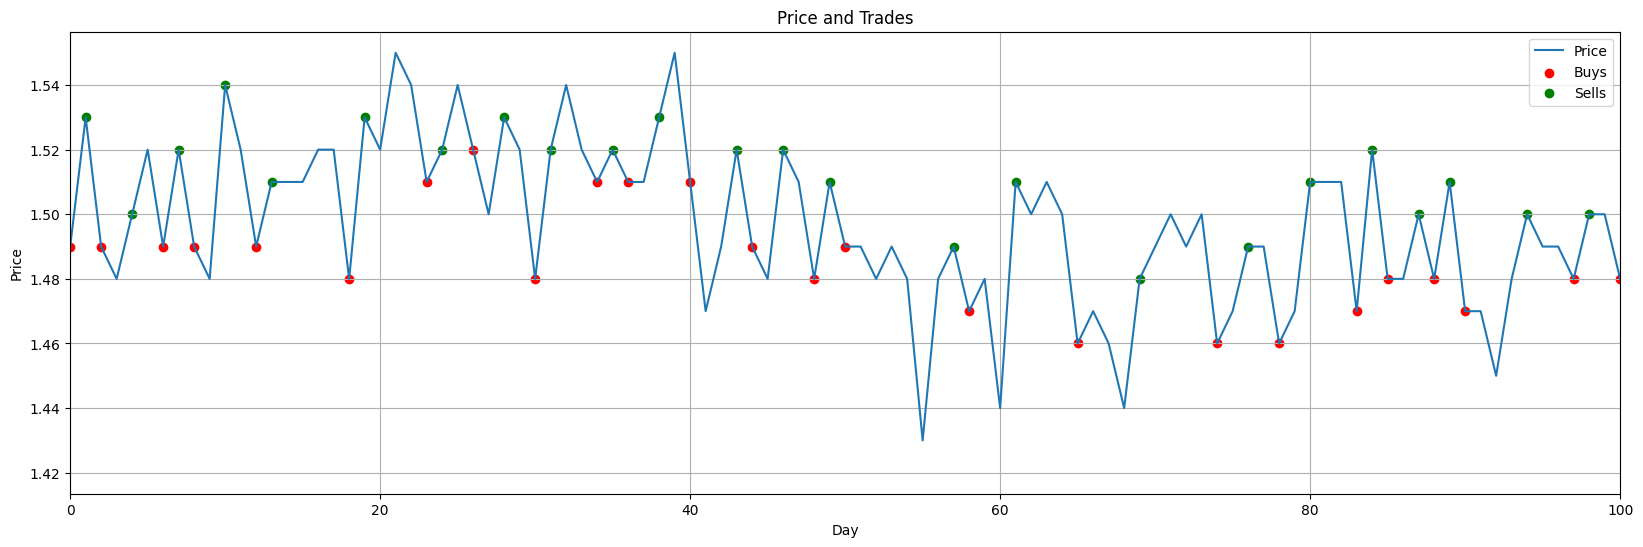

In [46]:
plt.figure(figsize=(20,6))
plt.plot(goober_df['Price'], label='Price')
plt.scatter(buy_trade, goober_df['Price'][goober_df['Traded'] == 1], color='red', label='Buys')
plt.scatter(sell_trade, goober_df['Price'][goober_df['Traded'] == -1], color='green', label='Sells')
plt.legend()
plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price and Trades')
plt.xlim(0, 100)
plt.show()